Getting Transcript from Youtube Video

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


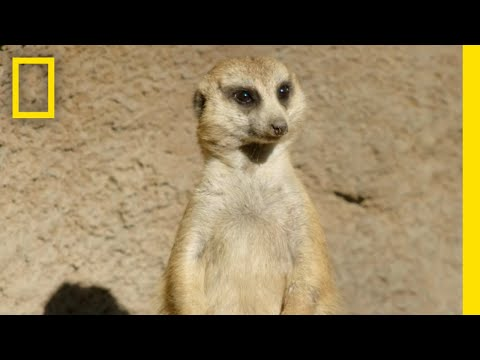

In [14]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

youtube_video = "https://www.youtube.com/watch?v=6he_RsHYn9s"
video_id = youtube_video.split("=")[1]

from IPython.display import YouTubeVideo

YouTubeVideo(video_id)

In [173]:
transcript = YouTubeTranscriptApi.get_transcript(video_id)
YouTubeTranscriptApi.get_transcript(video_id)

text = ""
for i in transcript:
    text += ' ' + i['text']

TEXT_LENGTH = len(text) 
TEXT_LENGTH

2588

Text Pre-processing

In [148]:
# Text before Processing
text

" On a sunny morning at Disney's Animal Kingdom theme park, the meerkats\ncome outside to catch some rays. They like to lay in the sun. Some people call them solar powered,\nso they sit like this with their little bellies up to the sky. You'll see them kind of sitting\nin the sun, taking it in, especially early in the morning on those cooler mornings,\nor if it's been kind of raining. There's so much\nI love about working with the meerkats. I try not to pick favorites. I love all the meerkats very much,\nand they all are very special. Hi, buddy. You are so cute. I know. I love you. Can't favor you on camera. That's just embarrassing. These Southern African desert dudes love their creepy crawly snacks. So today I'm feeding the meerkats,\nsuper worms and mealworms. And they definitely love\nthose super worms is their favorite snack. I've been working with them\nfor a really long time. That means that I've been able to learn all their individual quirks\nand personalities, and so I can sor

In [159]:
# Lowercasing
text_lower = text.lower().strip()
text_lower

"on a sunny morning at disney's animal kingdom theme park, the meerkats\ncome outside to catch some rays. they like to lay in the sun. some people call them solar powered,\nso they sit like this with their little bellies up to the sky. you'll see them kind of sitting\nin the sun, taking it in, especially early in the morning on those cooler mornings,\nor if it's been kind of raining. there's so much\ni love about working with the meerkats. i try not to pick favorites. i love all the meerkats very much,\nand they all are very special. hi, buddy. you are so cute. i know. i love you. can't favor you on camera. that's just embarrassing. these southern african desert dudes love their creepy crawly snacks. so today i'm feeding the meerkats,\nsuper worms and mealworms. and they definitely love\nthose super worms is their favorite snack. i've been working with them\nfor a really long time. that means that i've been able to learn all their individual quirks\nand personalities, and so i can sort

In [160]:
# Removal of Emojis, Newline if Present
import re
    # UNICODES for Emojis
    # "\U0001F600-\U0001F64F"  # emoticons
    # "\U0001F300-\U0001F5FF"  # symbols & pictographs
    # "\U0001F680-\U0001F6FF"  # transport & map symbols
    # "\U0001F1E0-\U0001F1FF"  # flags (iOS)
text_nonewl = re.sub(r'\n', ' ', text_lower)
text_noemojis = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]', '', text_nonewl)
text_dotspace = re.sub(r"[\.].",". ",text_noemojis)
text_dotspace

"on a sunny morning at disney's animal kingdom theme park, the meerkats come outside to catch some rays. they like to lay in the sun. some people call them solar powered, so they sit like this with their little bellies up to the sky. you'll see them kind of sitting in the sun, taking it in, especially early in the morning on those cooler mornings, or if it's been kind of raining. there's so much i love about working with the meerkats. i try not to pick favorites. i love all the meerkats very much, and they all are very special. hi, buddy. you are so cute. i know. i love you. can't favor you on camera. that's just embarrassing. these southern african desert dudes love their creepy crawly snacks. so today i'm feeding the meerkats, super worms and mealworms. and they definitely love those super worms is their favorite snack. i've been working with them for a really long time. that means that i've been able to learn all their individual quirks and personalities, and so i can sort of tell t

In [161]:
# Removal of Punctuations
import re
text_nopunct = re.sub(r'[^\w\s]','',text_dotspace)
text_nopunct

'on a sunny morning at disneys animal kingdom theme park the meerkats come outside to catch some rays they like to lay in the sun some people call them solar powered so they sit like this with their little bellies up to the sky youll see them kind of sitting in the sun taking it in especially early in the morning on those cooler mornings or if its been kind of raining theres so much i love about working with the meerkats i try not to pick favorites i love all the meerkats very much and they all are very special hi buddy you are so cute i know i love you cant favor you on camera thats just embarrassing these southern african desert dudes love their creepy crawly snacks so today im feeding the meerkats super worms and mealworms and they definitely love those super worms is their favorite snack ive been working with them for a really long time that means that ive been able to learn all their individual quirks and personalities and so i can sort of tell them apart by what theyre doing thom

In [162]:
# Tokenizing
from nltk.tokenize import word_tokenize

tokenized_text = word_tokenize(text_nopunct)
print(tokenized_text)

['on', 'a', 'sunny', 'morning', 'at', 'disneys', 'animal', 'kingdom', 'theme', 'park', 'the', 'meerkats', 'come', 'outside', 'to', 'catch', 'some', 'rays', 'they', 'like', 'to', 'lay', 'in', 'the', 'sun', 'some', 'people', 'call', 'them', 'solar', 'powered', 'so', 'they', 'sit', 'like', 'this', 'with', 'their', 'little', 'bellies', 'up', 'to', 'the', 'sky', 'youll', 'see', 'them', 'kind', 'of', 'sitting', 'in', 'the', 'sun', 'taking', 'it', 'in', 'especially', 'early', 'in', 'the', 'morning', 'on', 'those', 'cooler', 'mornings', 'or', 'if', 'its', 'been', 'kind', 'of', 'raining', 'theres', 'so', 'much', 'i', 'love', 'about', 'working', 'with', 'the', 'meerkats', 'i', 'try', 'not', 'to', 'pick', 'favorites', 'i', 'love', 'all', 'the', 'meerkats', 'very', 'much', 'and', 'they', 'all', 'are', 'very', 'special', 'hi', 'buddy', 'you', 'are', 'so', 'cute', 'i', 'know', 'i', 'love', 'you', 'cant', 'favor', 'you', 'on', 'camera', 'thats', 'just', 'embarrassing', 'these', 'southern', 'african',

In [163]:
# Removal of stop-words in ENGLISH (very frequent and very rare words occured) 
from nltk.corpus import stopwords
tokens = []
for i in tokenized_text:
    if not i in list(stopwords.words('english')):
        tokens.append(i)

print(tokens)

['sunny', 'morning', 'disneys', 'animal', 'kingdom', 'theme', 'park', 'meerkats', 'come', 'outside', 'catch', 'rays', 'like', 'lay', 'sun', 'people', 'call', 'solar', 'powered', 'sit', 'like', 'little', 'bellies', 'sky', 'youll', 'see', 'kind', 'sitting', 'sun', 'taking', 'especially', 'early', 'morning', 'cooler', 'mornings', 'kind', 'raining', 'theres', 'much', 'love', 'working', 'meerkats', 'try', 'pick', 'favorites', 'love', 'meerkats', 'much', 'special', 'hi', 'buddy', 'cute', 'know', 'love', 'cant', 'favor', 'camera', 'thats', 'embarrassing', 'southern', 'african', 'desert', 'dudes', 'love', 'creepy', 'crawly', 'snacks', 'today', 'im', 'feeding', 'meerkats', 'super', 'worms', 'mealworms', 'definitely', 'love', 'super', 'worms', 'favorite', 'snack', 'ive', 'working', 'really', 'long', 'time', 'means', 'ive', 'able', 'learn', 'individual', 'quirks', 'personalities', 'sort', 'tell', 'apart', 'theyre', 'thomas', 'arlo', 'springsteen', 'bentley', 'nirvana', 'newt', 'moment', 'time', '

In [164]:
# Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

tokens_stemmed = []
for token in tokens:
    tokens_stemmed.append(stemmer.stem(token))

print(tokens_stemmed)

['sunni', 'morn', 'disney', 'anim', 'kingdom', 'theme', 'park', 'meerkat', 'come', 'outsid', 'catch', 'ray', 'like', 'lay', 'sun', 'peopl', 'call', 'solar', 'power', 'sit', 'like', 'littl', 'belli', 'sky', 'youll', 'see', 'kind', 'sit', 'sun', 'take', 'especi', 'earli', 'morn', 'cooler', 'morn', 'kind', 'rain', 'there', 'much', 'love', 'work', 'meerkat', 'tri', 'pick', 'favorit', 'love', 'meerkat', 'much', 'special', 'hi', 'buddi', 'cute', 'know', 'love', 'cant', 'favor', 'camera', 'that', 'embarrass', 'southern', 'african', 'desert', 'dude', 'love', 'creepi', 'crawli', 'snack', 'today', 'im', 'feed', 'meerkat', 'super', 'worm', 'mealworm', 'definit', 'love', 'super', 'worm', 'favorit', 'snack', 'ive', 'work', 'realli', 'long', 'time', 'mean', 'ive', 'abl', 'learn', 'individu', 'quirk', 'person', 'sort', 'tell', 'apart', 'theyr', 'thoma', 'arlo', 'springsteen', 'bentley', 'nirvana', 'newt', 'moment', 'time', 'would', 'say', 'newton', 'probabl', 'domin', 'anim', 'surpris', 'he', 'one', 

In [165]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

tokens_lemmatized = []
for token in tokens:
	tokens_lemmatized.append(lemmatizer.lemmatize(token))

print(tokens_lemmatized)

['sunny', 'morning', 'disney', 'animal', 'kingdom', 'theme', 'park', 'meerkat', 'come', 'outside', 'catch', 'ray', 'like', 'lay', 'sun', 'people', 'call', 'solar', 'powered', 'sit', 'like', 'little', 'belly', 'sky', 'youll', 'see', 'kind', 'sitting', 'sun', 'taking', 'especially', 'early', 'morning', 'cooler', 'morning', 'kind', 'raining', 'there', 'much', 'love', 'working', 'meerkat', 'try', 'pick', 'favorite', 'love', 'meerkat', 'much', 'special', 'hi', 'buddy', 'cute', 'know', 'love', 'cant', 'favor', 'camera', 'thats', 'embarrassing', 'southern', 'african', 'desert', 'dude', 'love', 'creepy', 'crawly', 'snack', 'today', 'im', 'feeding', 'meerkat', 'super', 'worm', 'mealworm', 'definitely', 'love', 'super', 'worm', 'favorite', 'snack', 'ive', 'working', 'really', 'long', 'time', 'mean', 'ive', 'able', 'learn', 'individual', 'quirk', 'personality', 'sort', 'tell', 'apart', 'theyre', 'thomas', 'arlo', 'springsteen', 'bentley', 'nirvana', 'newt', 'moment', 'time', 'would', 'say', 'newt

In [166]:
# Removed words with no meaning
import enchant
dictionary = enchant.Dict("en_US") # Imported an English dictionary
    
tokens_final = tokens_lemmatized
for token in tokens_final:
    if not dictionary.check(token):
        tokens_final.remove(token)

print(tokens_final)

['sunny', 'morning', 'animal', 'kingdom', 'theme', 'park', 'meerkat', 'come', 'outside', 'catch', 'ray', 'like', 'lay', 'sun', 'people', 'call', 'solar', 'powered', 'sit', 'like', 'little', 'belly', 'sky', 'see', 'kind', 'sitting', 'sun', 'taking', 'especially', 'early', 'morning', 'cooler', 'morning', 'kind', 'raining', 'there', 'much', 'love', 'working', 'meerkat', 'try', 'pick', 'favorite', 'love', 'meerkat', 'much', 'special', 'hi', 'buddy', 'cute', 'know', 'love', 'cant', 'favor', 'camera', 'embarrassing', 'southern', 'desert', 'dude', 'love', 'creepy', 'crawly', 'snack', 'today', 'feeding', 'meerkat', 'super', 'worm', 'mealworm', 'definitely', 'love', 'super', 'worm', 'favorite', 'snack', 'working', 'really', 'long', 'time', 'mean', 'able', 'learn', 'individual', 'quirk', 'personality', 'sort', 'tell', 'apart', 'thomas', 'springsteen', 'nirvana', 'newt', 'moment', 'time', 'would', 'say', 'newton', 'probably', 'dominant', 'animal', 'surprising', 'he', 'one', 'youngest', 'animal', 

Summarisation Process

In [167]:
# Calculate Word-Token Frequencies
word_frequencies = {}
for word in tokens_final: 
    if word not in word_frequencies.keys(): 
        word_frequencies[word] = 1 
    else: 
        word_frequencies[word] += 1 
print(word_frequencies)

{'sunny': 1, 'morning': 3, 'animal': 3, 'kingdom': 1, 'theme': 1, 'park': 1, 'meerkat': 6, 'come': 3, 'outside': 1, 'catch': 1, 'ray': 1, 'like': 4, 'lay': 1, 'sun': 2, 'people': 1, 'call': 2, 'solar': 1, 'powered': 1, 'sit': 1, 'little': 1, 'belly': 1, 'sky': 4, 'see': 3, 'kind': 4, 'sitting': 1, 'taking': 2, 'especially': 1, 'early': 1, 'cooler': 1, 'raining': 1, 'there': 2, 'much': 2, 'love': 5, 'working': 2, 'try': 2, 'pick': 1, 'favorite': 2, 'special': 1, 'hi': 1, 'buddy': 1, 'cute': 1, 'know': 2, 'cant': 1, 'favor': 1, 'camera': 1, 'embarrassing': 1, 'southern': 1, 'desert': 1, 'dude': 1, 'creepy': 1, 'crawly': 1, 'snack': 2, 'today': 1, 'feeding': 1, 'super': 2, 'worm': 2, 'mealworm': 1, 'definitely': 2, 'really': 3, 'long': 1, 'time': 2, 'mean': 2, 'able': 1, 'learn': 1, 'individual': 1, 'quirk': 1, 'personality': 1, 'sort': 1, 'tell': 1, 'apart': 1, 'thomas': 1, 'springsteen': 1, 'nirvana': 1, 'newt': 1, 'moment': 1, 'would': 3, 'say': 2, 'newton': 1, 'probably': 1, 'dominant

In [168]:
# Normalize Word-Token Frequencies
max_freq_word = max(word_frequencies.values())
for word in word_frequencies.keys(): 
    word_frequencies[word] = word_frequencies[word] / max_freq_word
print(word_frequencies)

{'sunny': 0.16666666666666666, 'morning': 0.5, 'animal': 0.5, 'kingdom': 0.16666666666666666, 'theme': 0.16666666666666666, 'park': 0.16666666666666666, 'meerkat': 1.0, 'come': 0.5, 'outside': 0.16666666666666666, 'catch': 0.16666666666666666, 'ray': 0.16666666666666666, 'like': 0.6666666666666666, 'lay': 0.16666666666666666, 'sun': 0.3333333333333333, 'people': 0.16666666666666666, 'call': 0.3333333333333333, 'solar': 0.16666666666666666, 'powered': 0.16666666666666666, 'sit': 0.16666666666666666, 'little': 0.16666666666666666, 'belly': 0.16666666666666666, 'sky': 0.6666666666666666, 'see': 0.5, 'kind': 0.6666666666666666, 'sitting': 0.16666666666666666, 'taking': 0.3333333333333333, 'especially': 0.16666666666666666, 'early': 0.16666666666666666, 'cooler': 0.16666666666666666, 'raining': 0.16666666666666666, 'there': 0.3333333333333333, 'much': 0.3333333333333333, 'love': 0.8333333333333334, 'working': 0.3333333333333333, 'try': 0.3333333333333333, 'pick': 0.16666666666666666, 'favor

In [169]:
# Tokenize Sentences
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

sentences = sent_tokenize(text_dotspace)
sentences_nopunct = sent_tokenize(text_nopunct)

sentence_score = {}
for sentence in sentences:
    #tokens of the sentence
    #tokens are lemmatized to match 'tokens_final' list
     sent_tokens = []
     for sent_token in word_tokenize(sentence):
          sent_tokens.append(lemmatizer.lemmatize(sent_token))

     #each token's generalized frequency is summed up for a sentence
     for token in sent_tokens:
          if token in tokens_final:
              if sentence not in sentence_score.keys():
                   sentence_score[sentence] = word_frequencies[token]
              else:
                   sentence_score[sentence] += word_frequencies[token]

print(sentence_score)    

{"on a sunny morning at disney's animal kingdom theme park, the meerkats come outside to catch some rays.": 3.6666666666666665, 'they like to lay in the sun.': 1.1666666666666665, 'some people call them solar powered, so they sit like this with their little bellies up to the sky.': 2.6666666666666665, "you'll see them kind of sitting in the sun, taking it in, especially early in the morning on those cooler mornings, or if it's been kind of raining.": 4.333333333333333, "there's so much i love about working with the meerkats.": 2.833333333333333, 'i try not to pick favorites.': 0.8333333333333333, 'i love all the meerkats very much, and they all are very special.': 2.3333333333333335, 'hi, buddy.': 0.3333333333333333, 'you are so cute.': 0.16666666666666666, 'i know.': 0.3333333333333333, 'i love you.': 0.8333333333333334, "can't favor you on camera.": 0.3333333333333333, "that's just embarrassing.": 0.16666666666666666, 'these southern african desert dudes love their creepy crawly snac

In [177]:
# Select the sentences with maximum score

sentences_ranked = sorted(sentence_score.items(), key=lambda x:x[1], reverse = True)

summary = ""
if len(sentences_ranked) > 10: 
    for sentence, score in sentences_ranked[:10]:
        summary += "\n" + sentence.capitalize()
else:
    for sentence, score in sentences_ranked:
        summary += "\n" + sentence.capitalize()

SUMMARY_LENGTH = len(summary)
print(">> Extractive Summary:", summary)

>> Extractive Summary: 
So in a typical group, there would be a dominant female who selects the dominant male and they breed, and then the other members of the mob are responsible for raising the offspring, finding food, taking sentry duty, which means lookout to keep everybody safe.
You'll see them kind of sitting in the sun, taking it in, especially early in the morning on those cooler mornings, or if it's been kind of raining.
On a sunny morning at disney's animal kingdom theme park, the meerkats come outside to catch some rays.
Looks like he might have seen something in the sky that i cannot see.
But sometimes he likes to try it out and see how high he can get and test the waters.
At this moment in time, i would say that newton is probably our dominant animal.
Bentley is definitely not in charge and when it comes to our meerkat social rankings.
There's so much i love about working with the meerkats.
They're scanning the sky and the surrounding area to make sure there are no threats

In [178]:
SUMMARY_LENGTH

1133